## INIT

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import gc
import io
import pickle
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

import matplotlib.ticker as ticker

In [10]:
! pip install plotly

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [11]:
import sys
import time
import numpy as np
import ase.io as ase_io
from ase import Atoms
from tqdm import tnrange
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from scipy.optimize import minimize
import scipy.sparse.linalg as sps
import tqdm

In [ ]:
# QM 9 reference:
# Ramakrishnan, R., Dral, P. O., Rupp, M., & Lilienfeld, von, O. A. (2014). Quantum chemistry structures and properties of 134 kilo molecules. Scientific Data, 1, 191–7. http://doi.org/10.1038/sdata.2014.22


results from the literature

In [12]:
CM_qm9 = {}
CM_qm9['mae'] =(np.asarray([ 0.25945,  0.18383,  0.1596, 0.13856,  0.12797]) * 23.06035)
CM_qm9['tlen'] = (np.array([ 12953, 38651, 6.417e+04, 9.093e+04, 1.1533e+05]))
CM_qm9['Name'] = ['CM' for _ in CM_qm9['tlen']]


BOB_qm9 = {}
BOB_qm9['mae'] =(np.asarray([ 0.13493,  0.094765,  0.082273, 0.071428,  0.066554]) * 23.06035)
BOB_qm9['tlen'] = (np.array([ 13160, 38651, 6.417e+04, 9.093e+04, 1.1533e+05]))
BOB_qm9['Name'] = ['BOB' for _ in BOB_qm9['tlen']]

#x,BAML
#12953,0.093932
#38651,0.06774
#6.52e+04,0.059333
#9.093e+04,0.055284
#1.1717e+05,0.051059

#x,Wavelets
#100,0.26175
#200.79,0.19384
#396.85,0.1461
#796.8,0.12462
#1574.9,0.084483
#3162.3,0.058811
#6350,0.043938
#12549,0.033708


In [13]:
#FCHL18~\cite{fabe+18jcp}
FCHL_qm9 = {}
FCHL_qm9['mae'] =(np.asarray([ 0.27650121,  0.06367542,  0.03801476,  0.02734096,  0.01925599,  0.01317547]) * 23.06035)
FCHL_qm9['tlen'] = (np.array([ 100, 1000, 2500, 5000, 10000, 20000]))
FCHL_qm9['Name'] = ['FCHL18' for _ in FCHL_qm9['tlen']]

# FCHL19~\cite{chri+20jcp}
FCHL2_qm9 = {}
FCHL2_qm9['mae'] = (np.asarray([6.911306455044797, 4.228252218916488, 2.9721156664114154, 2.164505872934954, 2.1108291147717155, 1.5304225040537027, 1.3797944782165017, 1.1229463274671587, 0.9349338488632817, 0.6636338973243251, 0.47, 0.43, 0.29, 0.245]))
FCHL2_qm9['tlen'] = (np.array([100, 200, 400, 800, 1000, 1600, 2000, 3200, 5000, 10000,20000,25000,50000,75000]))
FCHL2_qm9['Name'] = ['FCHL19' for _ in FCHL2_qm9['tlen']]

SOAPGAPMK_qm9 = {}
SOAPGAPMK_qm9['mae'] = (np.asarray([ 0.013011, 0.005988, 0.003979, 0.001758, 0.001151, 0.000632, 0.000295]) * 27.2114 * 23.06035)
SOAPGAPMK_qm9['tlen'] = (np.array([ 0.001000, 0.005000,0.010000,0.050000,0.100000,0.250000,0.750000]) * 100000)
SOAPGAPMK_qm9['Name'] = ['SOAP' for _ in SOAPGAPMK_qm9['tlen']]

SLATM_qm9 = {}
SLATM_qm9['mae'] = (np.asarray([ 6.147, 4.484, 3.391, 2.865, 1.975, 1.369, 1.025, 0.778]))
SLATM_qm9['tlen'] = (np.array([ 100, 200, 400, 800, 1600, 3200, 6400, 12800]))
SLATM_qm9['Name'] = ['SLATM' for _ in SLATM_qm9['tlen']]

aSLATM_qm9 = {}
aSLATM_qm9['mae'] = (np.asarray([ 5.1594,  3.8448,  2.9498,  2.0133,  1.3931,  1.0340]))
aSLATM_qm9['tlen'] = (np.array([ 100, 200, 400, 800, 1600, 3200]))
aSLATM_qm9['Name'] = ['aSLATM' for _ in aSLATM_qm9['tlen']]

#SchNet~\cite{schu+18jcp}.
SchNet_qm9 = {}
SchNet_qm9['mae'] = (np.asarray([1.26533, 0.49,0.34,0.31]))
SchNet_qm9['tlen'] = (np.array([10000, 50000,100000,110462]))
SchNet_qm9['Name'] = ['SchNet' for _ in SchNet_qm9['tlen']]

# PhysNet~\cite{unke-meuw19jctc} 
PhysNet_qm9 = {}
PhysNet_qm9['mae'] = (np.asarray([0.3, 0.19, 0.19 ]))
PhysNet_qm9['tlen'] = (np.array([50000,100000,110462]))
PhysNet_qm9['Name'] = ['PhysNet' for _ in PhysNet_qm9['tlen']]

#SOAP~\cite{will+18pccp},
#Willatt, M. J., Musil, F., & Ceriotti, M. (2018). Feature Optimization for Atomistic Machine Learning Yields a Data-Driven Construction of the Periodic Table of the Elements. Physical Chemistry Chemical Physics. http://doi.org/10.1039/C8CP05921G
SOAP_PCCP = {}
SOAP_PCCP['tlen'] = np.asarray([500,  1250,  2500,  5000,  7500, 12500, 17500, 25000])
SOAP_PCCP['mae'] = np.asarray([5.8392 , 3.2734 , 2.2912 , 1.6037 , 1.2844 , 0.9966 , 0.8174 , 0.69205])*0.4147

#NICE\cite{niga+20jcp}
NICE_QUICK = {'mae': np.array([29.3911999 , 12.78903727,  5.53966114,  2.78655852,  1.51831158,
         0.91516518,  0.56249733,  0.41616204,  0.3449829 ]),
 'tlen': np.array([1.e+01, 3.e+01, 1.e+02, 3.e+02, 1.e+03, 3.e+03, 1.e+04, 3.e+04,
        1.e+05])}

In [41]:
# Gubaev, K., Podryabinkin, E. V., & Shapeev, A. V. (2018). Machine learning of molecular properties: Locality and active learning. Journal of Chemical Physics, 148(24), 241727. http://doi.org/10.1063/1.5005095

MTP_qm9={}
MTP_qm9['tlen'] = (np.array([1000,5000,10000,25000,50000]))
MTP_qm9['mae'] = (np.array([1.8, 0.9, 0.86, 0.63, 0.41]))
MTP_qm9['name'] = 'MTP'

# Zaverkin, V., & Kästner, J. (2020). Gaussian Moments as Physically Inspired Molecular Descriptors for Accurate and Scalable Machine Learning Potentials. Journal of Chemical Theory and Computation, 16(8), 5410–5421. http://doi.org/10.1021/acs.jctc.0c00347

GMsNN_qm9={}
GMsNN_qm9['tlen'] = (np.array([1000,5000,10000,25000,50000, 100000, 110426]))
GMsNN_qm9['mae'] = (np.array([2.16, 0.95, 0.71, 0.47, 0.36, 0.29, 0.27]))
GMsNN_qm9['name'] = 'GM-sNN'


In [14]:
nice_string = """
10 0.04683785872503487 0.012167718349218466 0.060055925186346434 0.015067455606136714
30 0.020380628303983548 0.00512671556488518 0.027342260124643657 0.006000345085746323
100 0.00882801201383395 0.0004892420125368112 0.01306822770153156 0.0006923977075840989
300 0.004440663695994541 0.00023588086496960942 0.007509189980628857 0.0008484875941489153
1000 0.0024195835287443507 0.00014820835386594727 0.004766194078793453 0.0007279630308173042
3000 0.0014584085535911666 6.400747308988244e-05 0.003811353497052315 0.000553271294550698
10000 0.0008963965671586354 2.3966733326122978e-05 0.003905621154660249 0.000916896378698705
30000 0.0006631964291052913 2.4344456870574358e-05 0.0036797320864934108 0.0019499187601920186
100000 0.0005497652493353327 5.2741538691884335e-05 0.008750769590754642 0.009321701289714731
"""
nice_array = np.loadtxt(io.StringIO(nice_string))

In [15]:
nice_array.shape

(9, 5)

In [16]:
NICE_QUICK = {}
NICE_QUICK['mae'] = 627.50947 * nice_array[:,1]
NICE_QUICK['tlen'] = nice_array[:,0]

In [17]:
NICE_QUICK

{'mae': array([29.3911999 , 12.78903727,  5.53966114,  2.78655852,  1.51831158,
         0.91516518,  0.56249733,  0.41616204,  0.3449829 ]),
 'tlen': array([1.e+01, 3.e+01, 1.e+02, 3.e+02, 1.e+03, 3.e+03, 1.e+04, 3.e+04,
        1.e+05])}

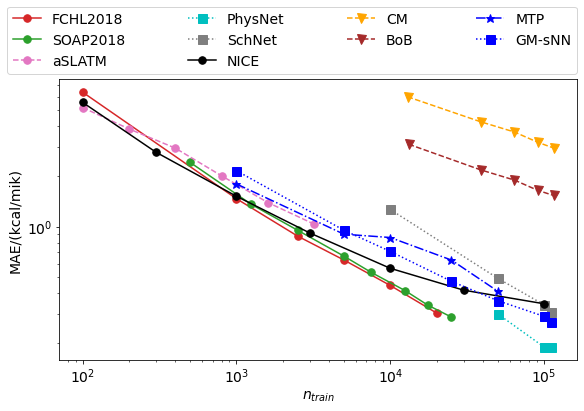

In [52]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(8,5.6))
matplotlib.rcParams.update({'font.size': 14})
ax.loglog(FCHL_qm9['tlen'], FCHL_qm9['mae'], 'tab:red', linestyle='solid', markersize=15, marker='.', label="FCHL2018")
ax.loglog(SOAP_PCCP['tlen'], SOAP_PCCP['mae'], 'tab:green', linestyle='solid', markersize=15,marker='.', label="SOAP2018")
ax.loglog(aSLATM_qm9['tlen'], aSLATM_qm9['mae'], 'tab:pink', linestyle='--', markersize=15,marker='.', label="aSLATM")
#ax.loglog(FCHL2_qm9['tlen'], FCHL2_qm9['mae'], 'tab:blue', linestyle='solid', markersize=15,marker='.', label="FCHL2019")
#plt.loglog(SOAPGAPMK_qm9['tlen'], SOAPGAPMK_qm9['mae'], 'tab:purple', linestyle='solid', markersize=12,marker='.', label="SOAP2017")
ax.loglog(PhysNet_qm9['tlen'], PhysNet_qm9['mae'], 'c', linestyle=':', markersize=9,marker='s', label="PhysNet")
#ax.loglog(SLATM_qm9['tlen'], SLATM_qm9['mae'], 'tab:green', linestyle='--', markersize=15,marker='.', label="SLATM")
ax.loglog(SchNet_qm9['tlen'], SchNet_qm9['mae'], 'tab:gray', linestyle=':', markersize=9,marker='s', label="SchNet")
ax.loglog(NICE_QUICK['tlen'][2:], NICE_QUICK['mae'][2:], 'black', linestyle='solid', markersize=15,marker='.', label="NICE")
ax.loglog(CM_qm9['tlen'][:], CM_qm9['mae'][:], 'orange', linestyle='--', markersize=9,marker='v', label="CM")
ax.loglog(BOB_qm9['tlen'][:], BOB_qm9['mae'][:], 'brown', linestyle='--', markersize=9,marker='v', label="BoB")
ax.loglog(MTP_qm9['tlen'][:], MTP_qm9['mae'][:], 'blue', linestyle='-.', markersize=9,marker='*', label="MTP")
ax.loglog(GMsNN_qm9['tlen'][:], GMsNN_qm9['mae'][:], 'blue', linestyle=':', markersize=9,marker='s', label="GM-sNN")

#ax.legend(bbox_to_anchor=(-0.18, 1.02, 1.18, .102), loc='lower left',
ax.legend(bbox_to_anchor=(-0.1, 1.02, 1.1, .102), loc='lower left',
            ncol=4, mode="expand", borderaxespad=0.)
ax.set_xlabel("$n_{train}$")
ax.set_ylabel("MAE/(kcal/mol)")
fig.savefig("qm9-lc-extended.pdf")